### Analiza danych behawioralnych - eksperyment Bert 1 (09-10.2015)

In [3]:
library("lme4")
library("lmerTest")
library("phia")
library("psyphy")
library("ggplot2")

In [2]:
options(jupyter.plot_mimetypes = "image/png")

Wczytywanie danych i porządkowanie nazw kolumn

In [3]:
dane = read.csv("anova.csv", sep=',')

In [4]:
names(dane)=tolower(names(dane))
names(dane)[names(dane) == 'accuracy_rt'] = 'acc_rt'
names(dane)[names(dane) == 'accuracy'] = 'acc'
names(dane)[names(dane) == 'duration_type'] = 'dur'

In [5]:
head(dane)

,x,id,task,block,trial,fiksacja3,fiksacja3_dur,fiksacja,fiksacja_dur,stimulus_type,ellip.h,fiksacja2_dur,beh_response,response_dur,button,acc,acc_rt,pas_response,pas_response_dur,pas,pas_rt
1,0,dc1_01,low,1,2,12.0558,3.0095,15.0653,1.7399,sn3,<8b>,2.0102,19.1211,1.5165,54,0,262.4,20.6494,1.4459,4,499.2
2,1,dc1_01,low,1,4,31.1591,2.0103,33.1694,1.7399,mn7,<8b>,2.0103,37.1899,1.5165,54,0,510,38.7182,1.4812,4,397.6
3,2,dc1_01,low,1,5,40.2112,2.0102,42.2214,1.7399,sc1,<8b>,2.0103,46.2772,1.5165,44,1,457.1,47.8055,1.446,4,479.4
4,3,dc1_01,low,1,6,49.2632,1.011,50.2742,1.7399,mn7,<8b>,6.0073,58.327,1.5165,54,0,1453.6,59.8553,1.446,4,1358.9
5,4,dc1_01,low,1,7,61.313,1.011,62.324,1.7399,mc1,<8b>,2.0102,66.4151,1.5165,54,1,1153.3,67.9433,1.4108,4,195.3
6,5,dc1_01,low,1,8,69.3658,2.0103,71.3761,1.7399,sc9,<8b>,4.0087,77.3951,1.5165,44,1,279.4,78.9234,1.4812,1,255.6


#### Kontrola przypadków odstających

Sprawdzenie średnich poprawności

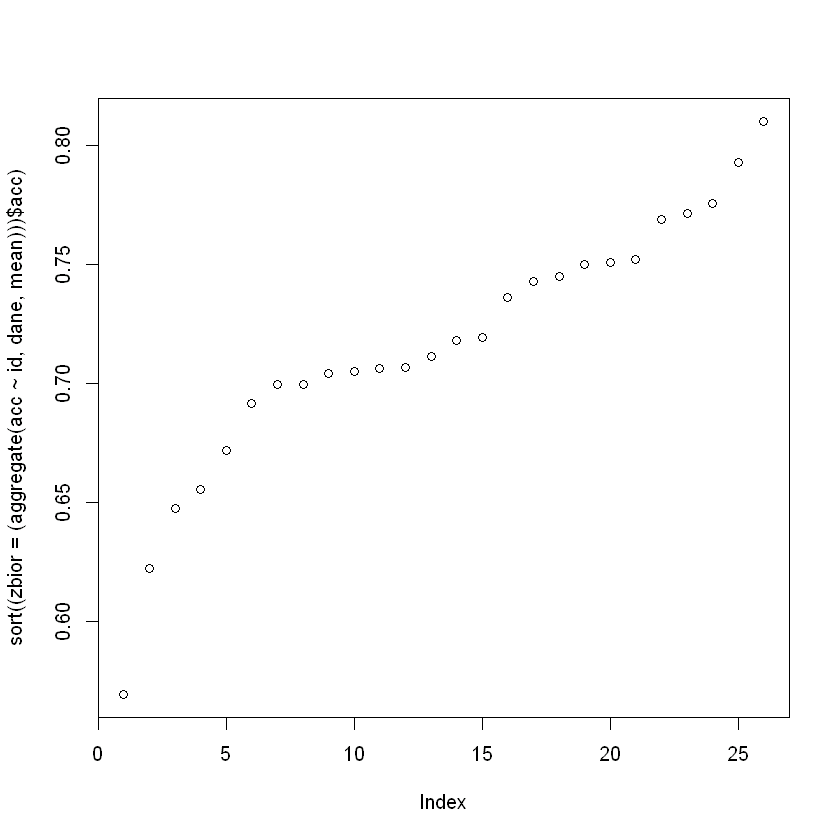

In [6]:
plot(sort((zbior=(aggregate(acc ~ id, dane, mean)))$acc))

Sprawdzenie odchylenia standardowego ocen na skali PAS

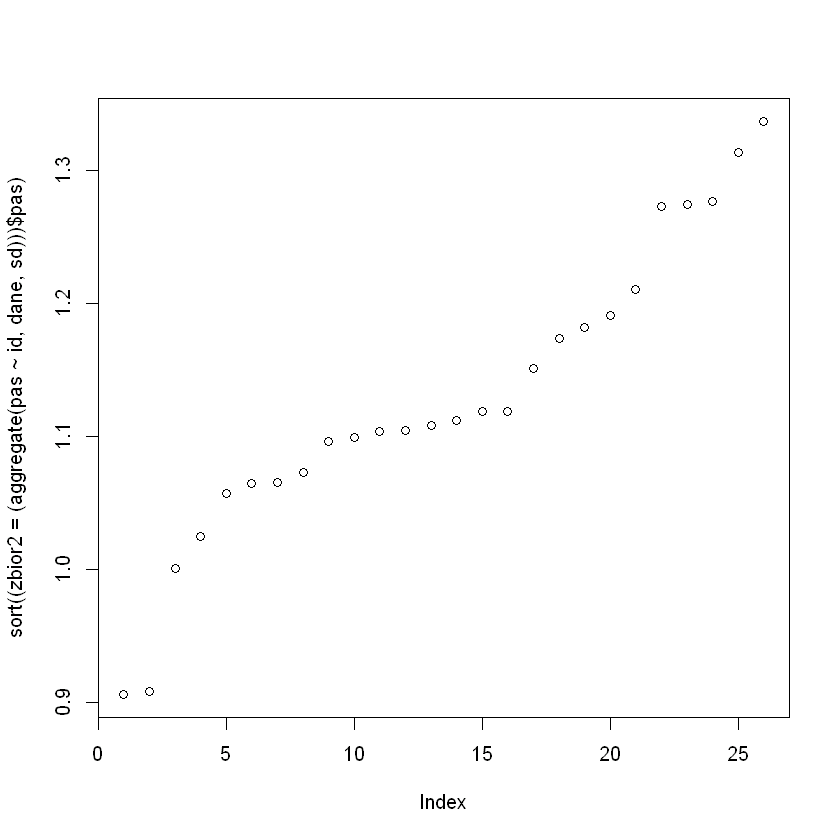

In [7]:
plot(sort((zbior2=(aggregate(pas ~ id, dane, sd)))$pas))

In [8]:
zbior=merge(zbior, zbior2,by='id')

Sprawdzenie wartości d'

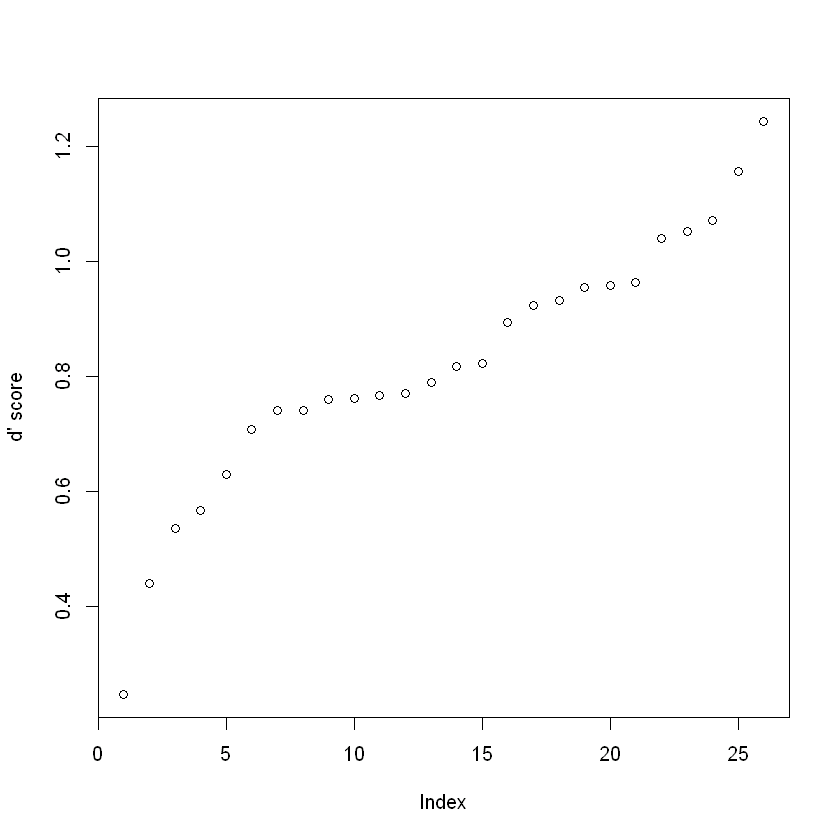

In [9]:
plot(sort(unlist((zbior$dprim=lapply(zbior$acc, function(x) dprime.mAFC(x,2))))),ylab="d' score")

In [44]:
# po tabeli 'zbior' można odnaleźć osoby o odstających wynikach

In [10]:
zbior

,id,acc,pas,dprim
1,dc1_01,0.6554622,1.182613,0.5658411
2,dc1_03,0.6996047,1.108715,0.7400242
3,dc1_04,0.7068273,1.073069,0.7695138
4,dc1_05,0.7509881,1.099638,0.9582748
5,dc1_06,0.7519685,1.001143,0.9626515
6,dc1_07,0.75,1.104674,0.9538726
7,dc1_09,0.6914062,1.273312,0.7068858
8,dc1_10,0.7755906,1.151471,1.071095
9,dc1_11,0.7929515,1.210489,1.154995
10,dc1_12,0.7114625,1.337315,0.7886534


#### Model mieszany dla analizy poprawności względem czasu prezentacji

In [12]:
m11 <- glmer(acc ~ -1 + dur / (pas * task) + (1|id), dane, family = binomial,
                           control = glmerControl(optimizer="bobyqa", optCtrl = list(maxfun = 1000000)))
m12 <- glmer(acc ~ -1 + dur / (pas) + (1|id), dane, family = binomial,
                           control = glmerControl(optimizer="bobyqa", optCtrl = list(maxfun = 1000000)))
anova(m11,m12)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m12,9,6203.177,6264.081,-3092.588,6185.177,NA,NA,NA
m11,17,6210.824,6325.866,-3088.412,6176.824,8.352371,8,0.399828


In [11]:
dane$pas<-as.numeric(dane$pas)
print(summary((m1 <- glmer(acc ~ -1 + dur / (pas * task) + (1|id), dane, family = binomial,
                           control = glmerControl(optimizer="bobyqa", optCtrl = list(maxfun = 1000000))))), corr = F)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: acc ~ -1 + dur/(pas * task) + (1 | id)
   Data: dane
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+06))

     AIC      BIC   logLik deviance df.resid 
  6210.8   6325.9  -3088.4   6176.8     6403 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-9.2795 -0.9343  0.2059  0.7325  1.4878 

Random effects:
 Groups Name        Variance Std.Dev.
 id     (Intercept) 0.05804  0.2409  
Number of obs: 6420, groups:  id, 26

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
durdur1             -0.12357    0.19562  -0.632 0.527601    
durdur2             -0.30714    0.18468  -1.663 0.096289 .  
durdur3             -1.48181    0.23225  -6.380 1.77e-10 ***
durdur4             -1.34523    0.36078  -3.729 0.000193 ***
durdur1:pas          0.21285    0.13561   1.570 0.116519    
durdur2:pas          0.48562    

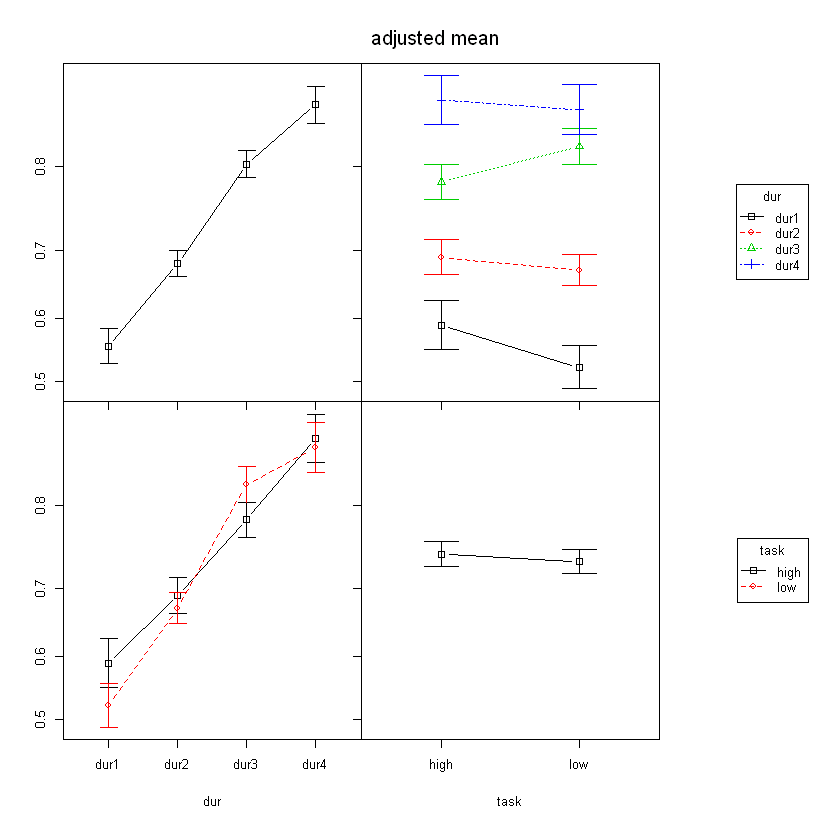

In [110]:
plot(interactionMeans(m1))

#### Model mieszany dla analizy poprawności względem oceny na skali PAS

In [82]:
dane$pas<-as.factor(dane$pas)
print(summary((m2 <- glmer(acc ~ -1 + pas / task + (1|id), dane, family = binomial,
                           control = glmerControl(optimizer="bobyqa", optCtrl = list(maxfun = 1000000))))), corr = F)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: acc ~ -1 + pas/task + (1 | id)
   Data: dane
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+06))

     AIC      BIC   logLik deviance df.resid 
  6327.4   6388.3  -3154.7   6309.4     6411 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-9.7052 -0.9551  0.2344  0.7630  1.3231 

Random effects:
 Groups Name        Variance Std.Dev.
 id     (Intercept) 0.08189  0.2862  
Number of obs: 6420, groups:  id, 26

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
pas1          0.14035    0.08176   1.717  0.08607 .  
pas2          0.47896    0.09520   5.031 4.88e-07 ***
pas3          2.12373    0.15613  13.603  < 2e-16 ***
pas4          4.20555    0.30921  13.601  < 2e-16 ***
pas1:tasklow -0.18480    0.08627  -2.142  0.03218 *  
pas2:tasklow  0.16452    0.10493   1.568  0.11691    
pas3:tasklow -0.02187    0.1

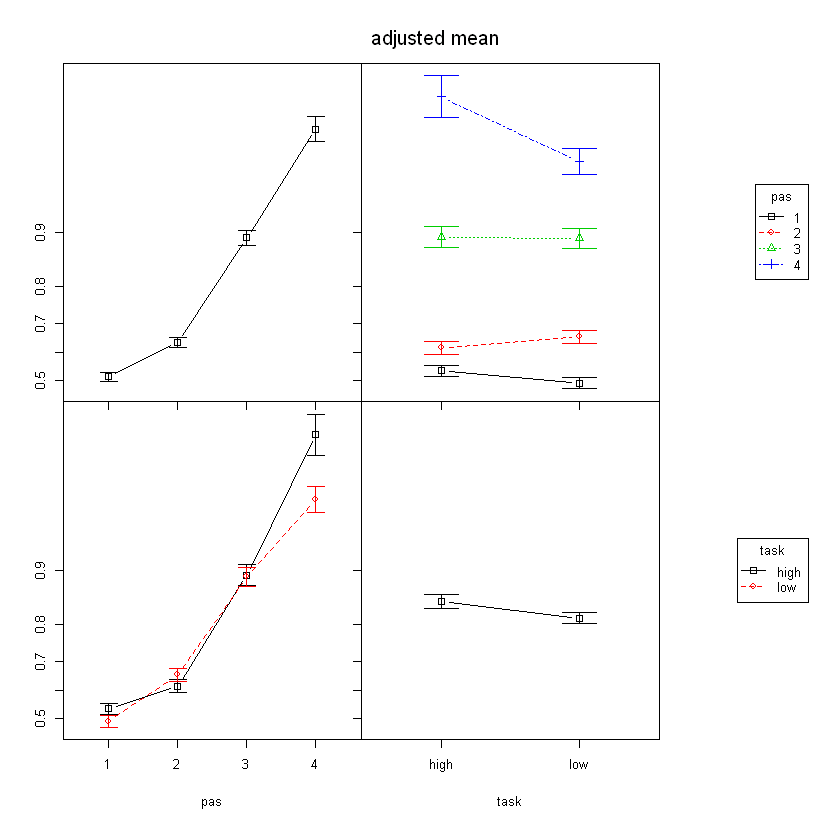

In [111]:
plot(interactionMeans(m2))

#### Model mieszany dla analizy oceny na skali PAS względem czasu prezentacji

In [88]:
dane1=dane[dane$acc==1,]
dane1$pas<-as.numeric(dane1$pas)

In [114]:
print(summary((pm1<-lmer(pas ~ -1 + dur / task + (1|id), dane1))), corr=F)

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: pas ~ -1 + dur/task + (1 | id)
   Data: dane1

REML criterion at convergence: 11109.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7559 -0.6135  0.0933  0.7363  3.3641 

Random effects:
 Groups   Name        Variance Std.Dev.
 id       (Intercept) 0.07655  0.2767  
 Residual             0.64098  0.8006  
Number of obs: 4597, groups:  id, 26

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    
durdur1         1.321e+00  6.698e-02 5.300e+01  19.721  < 2e-16 ***
durdur2         1.771e+00  6.530e-02 4.800e+01  27.125  < 2e-16 ***
durdur3         2.828e+00  6.319e-02 4.200e+01  44.755  < 2e-16 ***
durdur4         3.458e+00  6.179e-02 3.800e+01  55.968  < 2e-16 ***
durdur1:tasklow 4.060e-02  5.584e-02 4.566e+03   0.727    0.467    
durdur2:tasklow 2.217e-01  5.107e-02 4.565e+03   4.342 1.44e-05 ***
durdur3:tasklow 6.017e-02  4.46

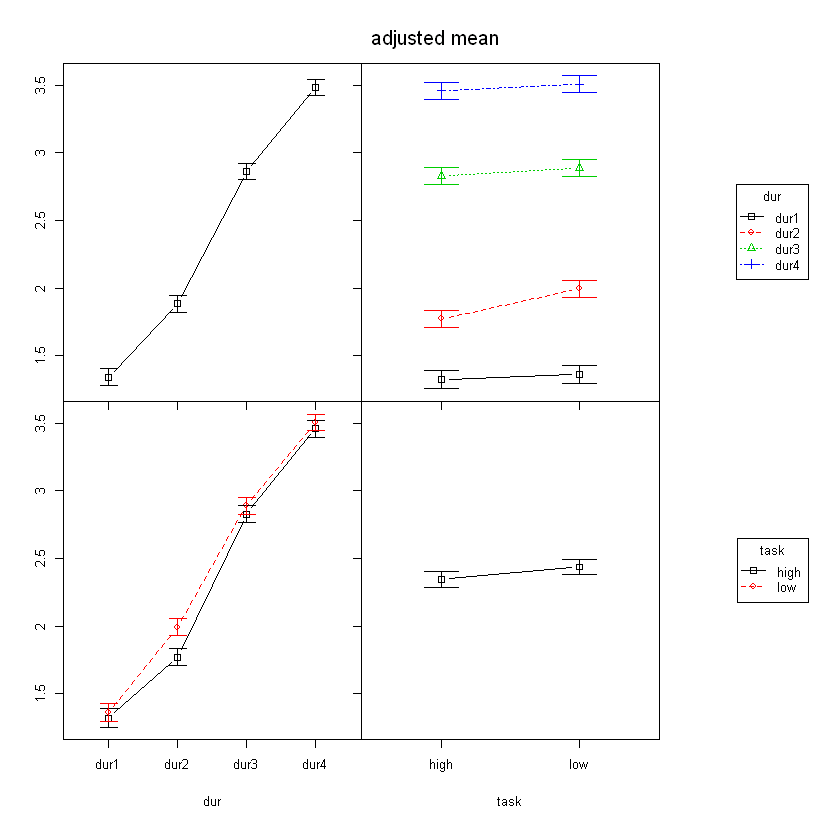

In [112]:
plot(interactionMeans(pm1))